[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/example_notebooks/autoregression_yosemite_temps.ipynb)

# TemporalFusionTransformer

This is a TemporalFusionTransformer model module usage example. We implemented this model under the same API as NeuralProphet, for easy comparison of the results of NeuralProphet and SOTA models.

We used as the base the implementation of TemporalFusionTransformer from Pytorch Forecasting library. The model parameters are inherited automatically from the dataset structure, if from_dataset is set to True.

For more detail on hyperparameters, please follow https://github.com/jdb78/pytorch-forecasting/blob/master/pytorch_forecasting/models/nbeats/__init__.py

In [ ]:
# install NeuralProphet from our repository
!pip install git+https://github.com/adasegroup/neural_prophet.git # may take a while

In [1]:
from neuralprophet import TFT
import pandas as pd

In [2]:
if 'google.colab' in str(get_ipython()):
    data_location = "https://raw.githubusercontent.com/adasegroup/neural_prophet/master/"
else:
    data_location = "../"

df = pd.read_csv(data_location + "example_data/yosemite_temps.csv")
df.head(3)
freq = '5min'

df = df.iloc[:1000]

In [3]:
tft = TFT(
    n_lags=10,
    n_forecasts=3,
    epochs=12,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    loss_func='QuantileLoss',
)

In [4]:
tft.fit(df, freq = freq)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | ModuleDict                      | 96    
4  | static_variable_selection          | VariableSelectionNetwork        | 1.7 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 1.8 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.2 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | 

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

,SmoothL1Loss,MAE,MSE,SmoothL1Loss_val,MAE_val,MSE_val
0,14.953603,15.453602,370.962634,21.471326,21.971326,651.058208
1,14.560248,15.060249,350.138236,19.298414,19.798414,505.440426
2,6.758341,7.238424,103.535289,5.157099,5.640739,54.970609
3,2.464107,2.912303,16.849561,1.338356,1.731949,8.008336
4,1.783918,2.219306,10.351207,1.974210,2.438348,12.189799
5,1.390126,1.817261,6.637621,1.399500,1.788810,6.212546
6,1.018893,1.420556,4.161280,1.114629,1.415648,4.971552
7,1.029480,1.450236,3.784188,0.842411,1.225660,2.845471
8,0.796082,1.190259,2.728823,0.827699,1.156475,2.869084
9,0.993020,1.382385,4.419290,1.261465,1.721693,4.761095


In [9]:
future = tft.make_future_dataframe(df, periods=3, n_historic_predictions=True)

In [10]:
forecast = tft.predict(future)

WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\np6\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)



In [11]:
forecast.iloc[-15:]

,ds,y,yhat1,yhat2,yhat3,residual1,residual2,residual3
988,2017-05-04 10:20:00,8.5,9.367577,9.281927,9.230281,0.867577,0.781927,0.730281
989,2017-05-04 10:25:00,8.3,9.308499,9.302552,9.362344,1.008499,1.002552,1.062344
990,2017-05-04 10:30:00,8.4,9.148806,9.235779,9.381197,0.748806,0.835779,0.981197
991,2017-05-04 10:35:00,8.3,9.104733,9.063117,9.310012,0.804733,0.763117,1.010012
992,2017-05-04 10:40:00,8.4,9.046217,9.019814,9.132979,0.646217,0.619814,0.732979
993,2017-05-04 10:45:00,8.3,9.078467,8.960049,9.092335,0.778467,0.660049,0.792335
994,2017-05-04 10:50:00,8.4,9.058497,8.997394,9.034885,0.658497,0.597394,0.634885
995,2017-05-04 10:55:00,8.3,9.100571,8.976337,9.076186,0.800571,0.676337,0.776186
996,2017-05-04 11:00:00,8.2,9.077339,9.022211,9.055924,0.877339,0.822211,0.855924
997,2017-05-04 11:05:00,8.2,9.001998,8.996394,9.103786,0.801998,0.796394,0.903786


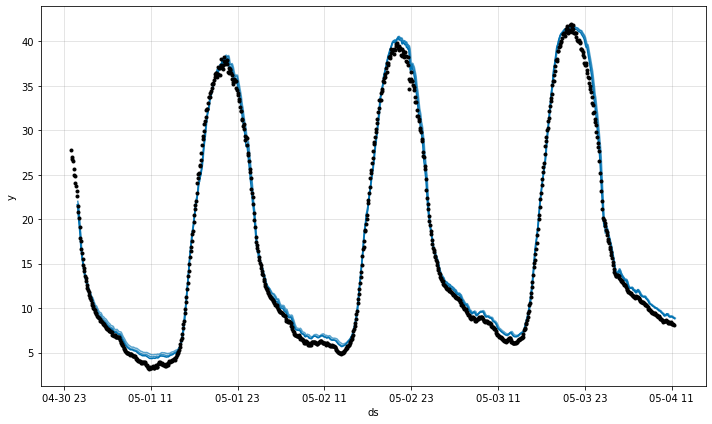

In [12]:
f = tft.plot(forecast)